<a href="https://colab.research.google.com/github/jpeoshadel/Deep-Learning-Course/blob/main/Copy_of_20250925_Project04_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 匯入相關套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import time # Import the time module

# 載入糖尿病資料集
# 請將 '/content/drive/MyDrive/diabetes.csv' 替換為您實際的檔案路徑
df = pd.read_csv("diabetes.csv")
dataset = df.values
np.random.shuffle(dataset) # 使用亂數打亂資料

# 分割成輸入的訓練資料和標籤資料(最後㇐個欄位為outcome)
X = dataset[:, :-1]
y = dataset[:, -1]

# 取得當前時間的最後一位數字作為 random_state
current_time = int(time.time())
last_digit = current_time % 10
print(f"Using last digit of current time as random_state: {last_digit}")

# 將資料分為train與test
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=last_digit) # 使用 last_digit 作為 random_state

Using last digit of current time as random_state: 1


Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77       170
         1.0       0.55      0.57      0.56        84

    accuracy                           0.70       254
   macro avg       0.66      0.67      0.67       254
weighted avg       0.70      0.70      0.70       254


Confusion matrix:
[[130  40]
 [ 36  48]]


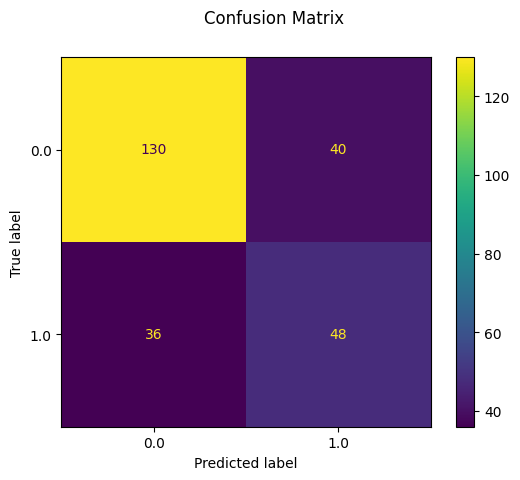

In [7]:
from sklearn import tree
# 建立模型
model = tree.DecisionTreeClassifier()
# 訓練模型
model.fit(X_train, y_train)
# 評估模型
y_pred = model.predict(X_test)
# 顯示結果
print(
f"Classification report for classifier {model}:\n"
f"{metrics.classification_report(y_test, y_pred)}\n"
)
# 查看混淆矩陣
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()